<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/K-Nearest-Neighbor/machine_learning_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 총 159개의 데이터 중 도미 데이터 35개 사용
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [2]:
# 빙어 데이터 14개
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

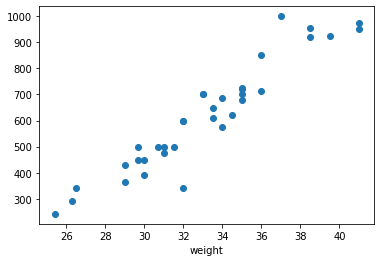

In [3]:
# 생선 데이터만 출력
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

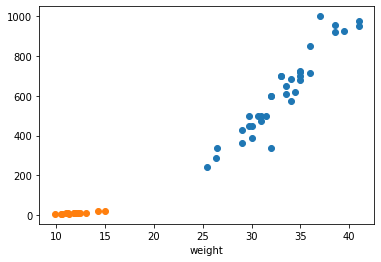

In [4]:
# 생선 & 빙어 데이터 출력
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

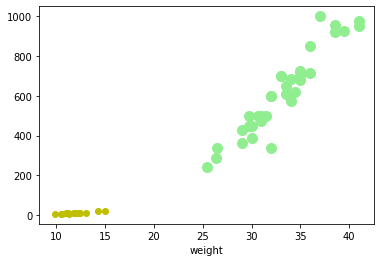

In [26]:
# 생선 & 빙어 데이터 색상 변경
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight, s = 100, c = 'lightgreen') # 파라미터 s = size, c = color 를 의미함
plt.scatter(smelt_length, smelt_weight, color = 'y') 
plt.xlabel('weight')
plt.show()

In [6]:
# k-Nearest Neighbor (k-최근접 이웃)
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

In [7]:
# 길이, 무게로 구성된 2차원 리스트
fish_data = [[l, w] for l, w in zip(length, weight)] # zip()은 나열된 리스트에서 원소를 하나씩 꺼내주는 역할
print(fish_data)
# 2차원 리스트: 첫 번째 생선의 길이와 무게가 하나의 리스트, 총 49개의 리스트를 구성하는 전체

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [8]:
# 정답 데이터: 도미와 빙어
# 0 = 빙어, 1 = 도미
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier() # 모델 생성
kn.fit(fish_data, fish_target) # 모델 학습
kn.score(fish_data, fish_target) # 모델 정확도

1.0

# 도미, 빙어, 테스트 데이터 산점도

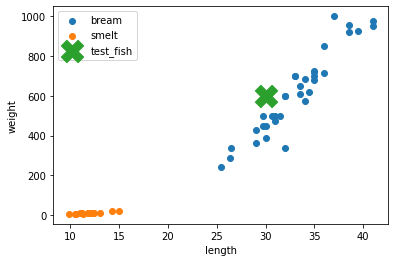

도미


In [27]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='X',s = 500) # x = 30, y = 500 위치에 X모양 field_marker 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(('bream', 'smelt', 'test_fish'))
plt.show()

print('빙어' if kn.predict([[30, 600]])[0] == 0 else '도미') # x = 30, y = 600 인 데이터를 K-NN 알고리즘으로 예측한 Class Label 반환

In [24]:
kn49 = KNeighborsClassifier(n_neighbors=49) # 참고 데이터를 49개로 한 모델

In [25]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

비율이 35:14 라 71.4%가 나옴

